# **Training the model**
In this notebook we are traing our regression model using the data we have cleaned and prepared in the previous notebook. We are using the following regression models:
- Linear Regression
- Random Forest Regressor
- Gradient Boosting Regressor
- AdaBoost Regressor
- SVR
- KNN Regressor
- Decision Tree Regressor
- XGBoost Regressor
- Ridge Regressor
- Lasso Regressor
- Extra Trees Regressor




In [18]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

#models
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
#evaluation metrics
from sklearn.metrics import r2_score,mean_absolute_error




In [4]:
df=pd.read_csv('modified_dataset.csv')
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu name,HDD,SSD,gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6830,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


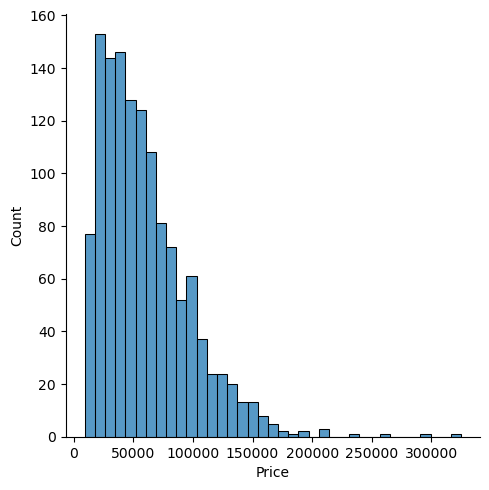

In [7]:
#ploting the target column "Price"
sns.displot(df['Price'])

**Insights:** The **target column(Price)** is skewed.

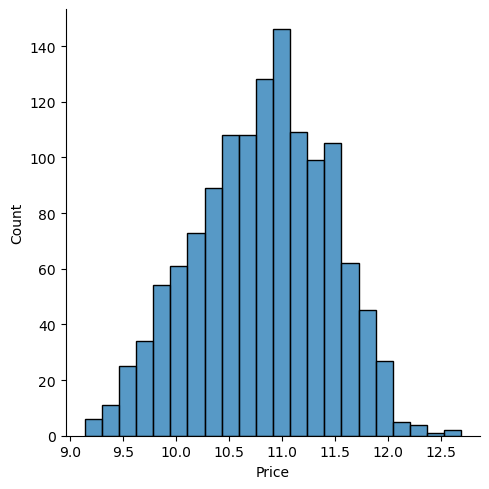

In [8]:
#applynig log on the target colum
sns.displot(np.log(df['Price']))

Insight: The **target column(Price)** was skewed. so i apply **np.log** to the target column to make it normal distribution.

In [15]:
#droping the target column and normalizing the target column
X=df.drop(columns=['Price'],axis=1)
y=np.log(df['Price'])


In [13]:
X

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu name,HDD,SSD,gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1298,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1299,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1300,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [14]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1297    10.433899
1298    11.288115
1299     9.409283
1300    10.614129
1301     9.886358
Name: Price, Length: 1302, dtype: float64

In [19]:
#spliting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
#creating a pipeline
step1 = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])
    ],remainder='passthrough')

step2 = RandomForestRegressor()

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

#predicting the test data
y_pred=pipe.predict(X_test)
print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))



c:\Users\Haseeb\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score:  0.8748766371204401
MAE:  0.1656325763879494
